In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier

In [2]:
data_created = pd.read_csv("./../result/data_created.csv")

In [3]:
X = data_created.loc[:, ["mvm", "sdvm", "df", "p625", "fpdf", "mangle", "sdangle"]]
Y = data_created.loc[:, "ActivityNumber"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 123, shuffle=True)

In [5]:
clfs = []
lr = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

clfs.append(lr)
clfs.append(svm)
clfs.append(rf)
clfs.append(dt)

In [6]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()),  # normalize data
    ('clf', SVC())  # fit Logistic regression model
])

In [24]:
for clf in clfs:
    pipeline.set_params(clf =  clf)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc_train = accuracy_score(pipeline.predict(X_train), y_train)
    acc_test = accuracy_score(y_test, y_pred)
    
    print("-----------------------------------------")
    print(str(clf))
    print("Accuracy of training set %f"%acc_train)
    print("Accuracy of test set %f"%acc_test)
    print(confusion_matrix(y_test, y_pred))
    #print("F1-score %f"%f1)
    #clf_disp = plot_roc_curve(pipeline, X_test, y_test)
    #plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
    #plt.show()

-----------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy of training set 0.927083
Accuracy of test set 0.890625
[[5 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0]
 [0 0 7 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 7 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 1 0 5 0]
 [0 0 0 0 0 0 4 0 2 2]]
-----------------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy of training set 0.833333
Accuracy of

In [11]:
# PCA
X_r = PCA(n_components=2).fit_transform(X)
#X_train, X_test, y_train, y_test = train_test_split(X_r, Y, test_size = 0.4, random_state = 123, shuffle=True)

In [18]:
np.array(Y)

array([ 1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  4,  5,  5,  5,  5,
        6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10,  1,  1,
        1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,
        7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10,  1,  1,  1,  2,  2,
        2,  2,  3,  3,  3,  4,  4,  4,  4,  5,  5,  5,  6,  6,  6,  6,  7,
        7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10,  1,  1,  1,  2,  2,  2,
        3,  3,  3,  3,  4,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  7,  7,
        7,  8,  8,  8,  9,  9,  9, 10, 10, 10,  1,  1,  1,  2,  2,  2,  3,
        3,  3,  4,  4,  4,  4,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,
        8,  9,  9,  9, 10, 10, 10])

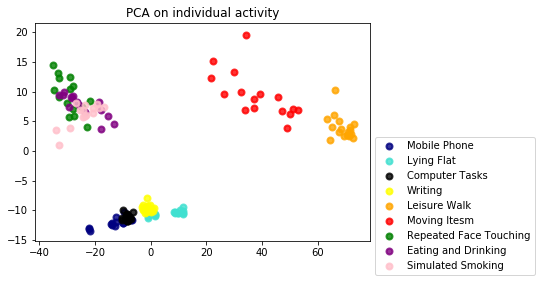

In [23]:
colors = ['navy', 'turquoise', 'black', 'yellow', 'orange', 'red', 'green', 'purple', 'pink']
#colors_test = ['yellow', 'red']
lw = 2
target_names = ['Mobile Phone',
                'Lying Flat',
                'Computer Tasks',
                'Writing',
                'Leisure Walk',
                'Moving Itesm',
                'Repeated Face Touching',
                'Eating and Drinking',
                'Simulated Smoking',
                'Adjusting Eyeglass']
Y = np.array(Y)
#target_names_test = ['non facetouching_test', 'facetouching_test']
for color, i, target_name in zip(colors, [i for i in range(1, 11)], target_names):
    plt.scatter(X_r[Y==i, 0], X_r[Y==i, 1], 
                color=color, alpha=.8, lw=lw,
                label=target_name)
'''
for color, i, target_name in zip(colors_test, [0, 1], target_names_test):
    plt.scatter(X_test[y_test==i, 0], X_test[y_test==i, 1], 
                color=color, alpha=.8, lw=lw,
                label=target_name)
'''
plt.title("PCA on individual activity")
plt.legend(bbox_to_anchor=(1, 0.5), shadow=False)

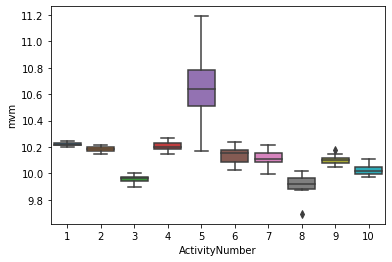

In [29]:
import seaborn as sns
ax = sns.boxplot(y="mvm", x="ActivityNumber", data=data_created)

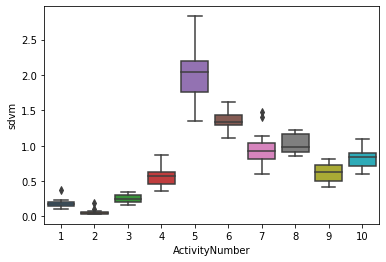

In [30]:
import seaborn as sns
ax = sns.boxplot(y="sdvm", x="ActivityNumber", data=data_created)

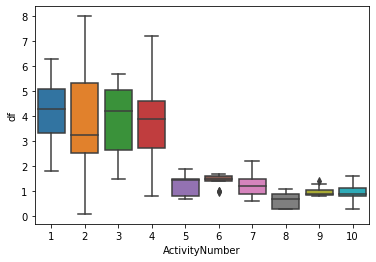

In [31]:
import seaborn as sns
ax = sns.boxplot(y="df", x="ActivityNumber", data=data_created)

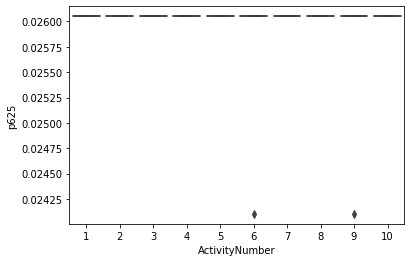

In [32]:
ax = sns.boxplot(y="p625", x="ActivityNumber", data=data_created)

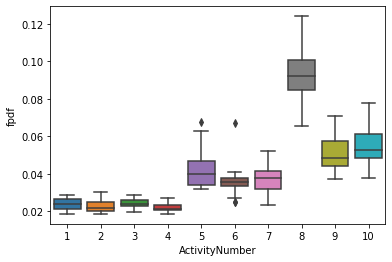

In [33]:
ax = sns.boxplot(y="fpdf", x="ActivityNumber", data=data_created)

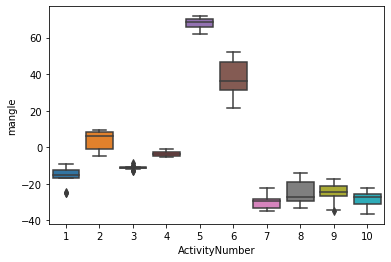

In [35]:
ax = sns.boxplot(y="mangle", x="ActivityNumber", data=data_created)

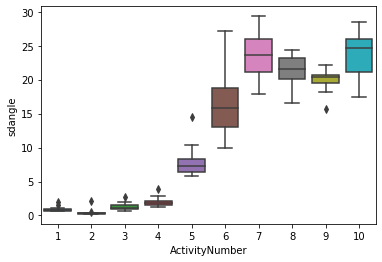

In [36]:
ax = sns.boxplot(y="sdangle", x="ActivityNumber", data=data_created)

In [26]:
data_created

,PID,ActivityNumber,group,mvm,sdvm,df,p625,fpdf,mangle,sdangle
0,3,1,0,10.212443,0.177938,6.2,0.026051,0.019942,-12.444212,0.851601
1,3,1,0,10.218438,0.378222,1.8,0.026051,0.020963,-12.031269,2.009492
2,3,1,0,10.212566,0.174238,4.3,0.026051,0.025539,-12.696323,0.595054
3,3,2,0,10.143824,0.188727,3.0,0.026051,0.018592,-4.512657,2.094529
4,3,2,0,10.146730,0.098754,1.8,0.026051,0.021329,-3.473577,0.363055
...,...,...,...,...,...,...,...,...,...,...
155,1,9,1,10.112501,0.625385,1.3,0.026051,0.064847,-18.978040,20.451570
156,1,9,1,10.070492,0.703799,0.8,0.026051,0.041686,-21.200810,20.647450
157,1,10,1,9.972411,1.066717,1.1,0.026051,0.051777,-27.394660,22.583918
158,1,10,1,10.109878,0.889149,0.7,0.026051,0.077718,-28.438843,17.460738
